<a href="https://colab.research.google.com/github/hmgu-itg/mybinder-TUM/blob/master/post/Python_Systems_Genetics_2021_TUM_Polygenic_Scoring_(Gilly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Exercise on Polygenic Scoring</h1>
<b>Systems Genetics Lecture - 25.11.21</b></br></br>
<i><small>Arthur Gilly (arthur.gilly@helmholtz-muenchen.de) - Ana Arruda (ana.arruda@helmholtz-muenchen.de)</i></small>
</center>

# Summary
In this exercise, we will apply two polygenic scores to a cohort of 1000 indivuduals. The samples come from the 1000 Genomes project, and the two scores are **a polygenic risk score for Coronary Artery Disease (CAD)** and a **polygenic score for levels of the MEP1B protein**. We will study the influence of ethnicity, see how well these two scores predict the traits in question, and finally, we will examine the polygenicity of these two traits through a genome-wide association.

## Downloading the data and installing libraries

We will need the `qmplot` library for displaying manhattan plots and the `liftover` library to transfer coordinates from one genomic build to the other.

**Question 1:** Install both libraries with `!pip install` and try loading them.


In [1]:
!pip install qmplot liftover

     |████████████████████████████████| 83 kB 1.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qmplot: filename=qmplot-0.1.6-py3-none-any.whl size=26051 sha256=badd06367e7a0b2a7e5607bd5954dd682ae54a0e24f696ae85e59a97e233075e
  Stored in directory: /root/.cache/pip/wheels/af/b0/6a/174c5e24d18b07a3517a9da16294552583bf67dfe7149fb3fd
  Created wheel for liftover: filename=liftover-1.1.11-cp37-cp37m-linux_x86_64.whl size=698530 sha256=af9d3e08e549303b1392c9734f4009e419b1e363b4f8c645efe70d8b5fd5d23f
  Stored in directory: /root/.cache/pip/wheels/89/fc/83/3d6db198ae47410498282bfa1d4a229e8e3c9d9bfc700c54ed
Successfully built qmplot liftover


In [2]:
import qmplot
import liftover

**Question 2:** Download Polygenic risk score PGS000337 from the PGS Catalog website using `wget` or `curl` and unzip it.

In [3]:
!wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000337/ScoringFiles/PGS000337.txt.gz

--2021-11-25 04:28:17--  https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000337/ScoringFiles/PGS000337.txt.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.197.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 916117 (895K) [application/octet-stream]
Saving to: ‘PGS000337.txt.gz’

PGS000337.txt.gz    100%[===================>] 894.65K  1.84MB/s    in 0.5s    

2021-11-25 04:28:18 (1.84 MB/s) - ‘PGS000337.txt.gz’ saved [916117/916117]



**Question 3:** Download the MEP1B PRS file from https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1 (hint: the `-O` argument of `wget` may be useful)

In [4]:
!wget https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1 -O MEP1B.gilly.prs.txt

--2021-11-25 04:28:18--  https://www.dropbox.com/s/o71gg622t2vnjqu/MEP1B.gilly.prs.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/o71gg622t2vnjqu/MEP1B.gilly.prs.txt [following]
--2021-11-25 04:28:18--  https://www.dropbox.com/s/dl/o71gg622t2vnjqu/MEP1B.gilly.prs.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4bc53e76244ac3dd5fa149afde.dl.dropboxusercontent.com/cd/0/get/BanYHv9-BzASZOUJyJl38bM9vv27_i-HNJ4bl6uVPjXN3zl9cREeLXeDD0sF5CfcHd5s1sgt1ZFFg35LWrY6nlGqt5D2awNetiKeNB0AFrXtJXNeUF3iKSkHvepgUbEjzGPO-ZpnyPBCiQV7LhI0ylCS/file?dl=1# [following]
--2021-11-25 04:28:19--  https://uc4bc53e76244ac3dd5fa149afde.dl.dropboxusercontent.com/cd/0/get/BanYHv9-BzASZOUJyJl38bM9vv27_i-HNJ4bl6uVPjXN3zl9cREeLXeDD0sF5CfcHd5

**Question 4**: Download the restricted genotype files from https://www.dropbox.com/s/civmjfv89ou72cc/PRS.course.forscore.tar.gz?dl=1 and the genome-wide genotype files from https://www.dropbox.com/s/oml7xw36yse7lld/PRS.course.geno.tar.gz?dl=1, and unzip them (hint: `tar -xvzf`)

In [5]:
!wget -O PRS.course.forscore.tar.gz https://www.dropbox.com/s/civmjfv89ou72cc/PRS.course.forscore.tar.gz?dl=1 && tar -xvzf PRS.course.forscore.tar.gz
!wget -O PRS.course.geno.tar.gz https://www.dropbox.com/s/oml7xw36yse7lld/PRS.course.geno.tar.gz?dl=1 && tar -xvzf PRS.course.geno.tar.gz


--2021-11-25 04:28:19--  https://www.dropbox.com/s/civmjfv89ou72cc/PRS.course.forscore.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/civmjfv89ou72cc/PRS.course.forscore.tar.gz [following]
--2021-11-25 04:28:19--  https://www.dropbox.com/s/dl/civmjfv89ou72cc/PRS.course.forscore.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb792fe68bf66a9fb5feab079c3.dl.dropboxusercontent.com/cd/0/get/BanMELsjLXleuB6mAp6Ynge_EjgTrXOZVgdtUUveDX3MJJTnpxHCTv0ysD0GLWjmuwp2QF-PXvftvfbqfgvZy6UE5cevaQJgrHF9WfZJc8gge2ft249w8QRWnK2qDfxSQQ0NGsijmyJyoaMbVvRm_wwR/file?dl=1# [following]
--2021-11-25 04:28:19--  https://ucb792fe68bf66a9fb5feab079c3.dl.dropboxusercontent.com/cd/0/get/BanMELsjLXleuB6mAp6Ynge_EjgTrXOZVgdtUUveDX3MJJ

## Lifting over the CAD score

The CAD score we downloaded is in build 37 of the human genome. All other files use build 38. We must first transfer all coordinates to that build. This process is called lifting over and can be performed in python using the `liftover` package.

**Question 4:** Load the CAD score file using `pandas`. The file is tab-separated, gzipped and uses `#` as a comment line.

In [6]:
import pandas as pd
cadscore=pd.read_csv("PGS000337.txt.gz",
                    sep="\t", comment="#")

**Question 5**: Using the below example, convert positions from the above file to build 38 of the human reference genome. Build 37 is also called `hg19` and build 38 is called `hg38`.
```python
from liftover import get_lifter
lo = get_lifter('hg19', 'hg38')
lo.convert_coordinate(1, 1171417)[0]
```

In [7]:
from liftover import get_lifter
lo = get_lifter('hg19', 'hg38')
cadscore['pos.b38']=cadscore.apply(lambda x:lo.convert_coordinate(x.chr_name, x.chr_position), axis=1)

In [8]:
cadscore

,chr_name,chr_position,effect_allele,effect_weight,variant_description,pos.b38
0,1,959231,A,0.011321,1:959231:G:A,"[(chr1, 1023851, +)]"
1,1,1119858,T,-0.016588,1:1119858:C:T,"[(chr1, 1184478, +)]"
2,1,1122024,C,0.013543,1:1122024:T:C,"[(chr1, 1186644, +)]"
3,1,1154858,T,-0.024307,1:1154858:C:T,"[(chr1, 1219478, +)]"
4,1,1171417,T,-0.012684,1:1171417:C:T,"[(chr1, 1236037, +)]"
...,...,...,...,...,...,...
75023,22,51091914,T,0.020546,22:51091914:C:T,"[(chr22, 50653486, +)]"
75024,22,51095286,T,0.022332,22:51095286:C:T,"[(chr22, 50656858, +)]"
75025,22,51104170,G,0.011036,22:51104170:A:G,"[(chr22, 50665742, +)]"
75026,22,51115863,A,0.021235,22:51115863:G:A,"[(chr22, 50677435, +)]"


**Question 5:** A position can map to several locations on another build, or they can map to alternate assemblies of the chromosomes. We do not trust these mappings. Restrict the dataframe to the positions that have a unique mapping, and to the positions that map to a chromosome of the form `chr1`...`chr22`. Create two columns, `chr_b38` and `ps_b38` to store the new chromosome and position.

In [9]:
ix=cadscore['pos.b38'].str.len()==1
cadscore=cadscore.loc[ix]
cadscore.loc[:, 'chr_b38']=cadscore['pos.b38'].map(lambda x: x[0][0])
cadscore.loc[:, 'ps_b38']=cadscore['pos.b38'].map(lambda x: x[0][1])
cadscore.drop(columns="pos.b38", inplace=True)
cadscore=cadscore[cadscore['chr_b38'].str.fullmatch("chr[\d]+")]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

**Question 6:** Create a score file with 3 columns, the first containing the position in the format `chr1:123456`, the second containing the effect allele, and the third containing the weight or effect size.

**Question 7:** Do the same for the MEP1B score. Note that the file is already in build 38, and the effect allele is `A1`, and that it is whitespace-separated.

In [10]:
scfile=pd.DataFrame({'id' : cadscore.chr_b38+":"+cadscore.ps_b38.astype(str), 'ea' : cadscore.effect_allele, 'wt' : cadscore.effect_weight})
scfile.to_csv("cad.scorefile", sep="\t", header=None, index=False)

mep1b_score=pd.read_table("MEP1B.gilly.prs.txt", delim_whitespace=True)
mep=pd.DataFrame({'id' : 'chr' + mep1b_score.chr.astype(str)+ ':' +mep1b_score.pos.astype(str), 'ea' : mep1b_score.A1, 'wt' : mep1b_score.effect})
mep.to_csv("mep1b.scorefile", sep="\t", header=None, index=False)

## Applying scores

### Method 1: The easy way using Plink

We will use the Plink genetic toolbox, which has embedded functions to apply polygenic scores.

**Question 8:** Download Plink 1.9 beta stable x64 and Plink 2 alpha AVX Intel from the official website at https://www.cog-genomics.org/plink and do a test run of both.

In [11]:
!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip && unzip plink_linux_x86_64_20210606.zip && rm prettify toy.* LICENSE
!./plink
!wget https://s3.amazonaws.com/plink2-assets/plink2_linux_avx2_20211011.zip && unzip plink2_linux_avx2_20211011.zip
!./plink2
!rm *.zip

--2021-11-25 04:28:28--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.221
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8917076 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20210606.zip’

plink_linux_x86_64_ 100%[===================>]   8.50M  55.5MB/s    in 0.2s    

2021-11-25 04:28:29 (55.5 MB/s) - ‘plink_linux_x86_64_20210606.zip’ saved [8917076/8917076]

Archive:  plink_linux_x86_64_20210606.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                
PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3

  plink <input flag(s)...> [command flag(s)...] [other fl

**Question 9:** Check the PLINK 1.9 user manual for applying risk scores and create two score profiles. Use the `autosomal.forPRS.{bed|bim|fam}` dataset for genotypes and the score files you have created in questions 6 and 7.

In [12]:
!./plink --bfile autosomal.forPRS --score cad.scorefile --out CAD
!./plink --bfile autosomal.forPRS --score mep1b.scorefile --out MEP1B

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to CAD.log.
Options in effect:
  --bfile autosomal.forPRS
  --out CAD
  --score cad.scorefile

12991 MB RAM detected; reserving 6495 MB for main workspace.
75624 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to CAD.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65

**Question 10:** Visualise the distributions of scores for the two scores you have just calculated (suggestion: `sns.histplot`)(hint: the profiles will be whitespace-separated). Comment on the distribution shape for both scores.

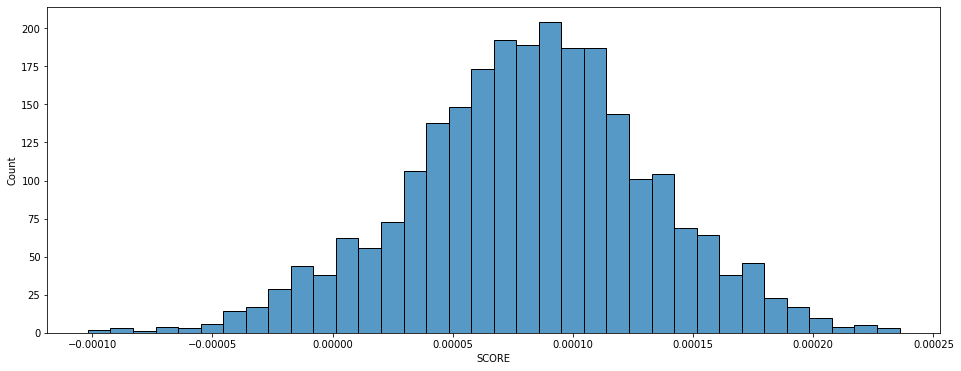

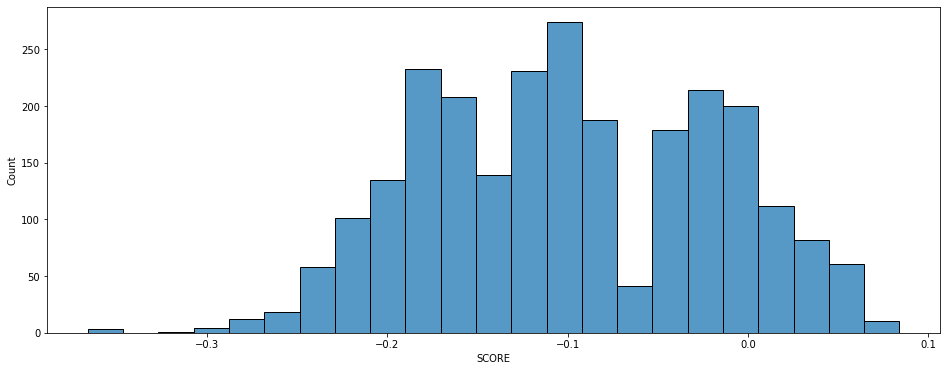

In [13]:
csc=pd.read_table("CAD.profile",
                    delim_whitespace=True)
msc=pd.read_table("MEP1B.profile",
                    delim_whitespace=True)
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(csc.SCORE, ax=axes)
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(msc.SCORE, ax=axes)

### Method 2: Manually applying scores (bonus section, only if you are proficient with `pandas`)

We do not exactly know what PLINK did for us. We can repeat the process manually using python's data manipulation tools.

**Question 11:** Load the `autosomal.forPRS.mx.traw` file. It is a matrix of genotypes with positions as rows and samples as columns. There are 7 "header" columns describing each position. For each score, restrict the dataframe to the positions in the score file, then apply an element-wise multiplication column by column, and sum the weighted genotypes: $score_j=\sum_{i \in SNPs}w_i*g_i$ where $i$ denotes SNPs and $j$ denotes individuals. For the CAD score, beware that the score file and genotype file do not contain the same variants, and that alleles may be different even if they are present.

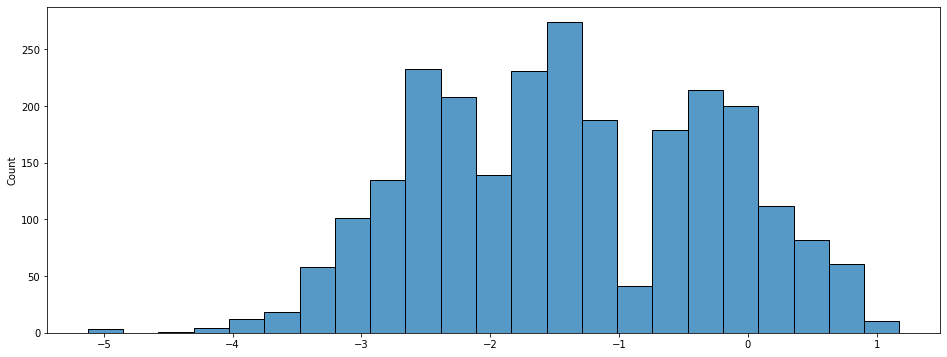

In [14]:
genos=pd.read_table("autosomal.forPRS.mx.traw",
                   delim_whitespace=True)
samplecols=genos.columns[6:]
mepg=genos[genos.SNP.isin(mep.id)]
mepg.reset_index(inplace=True)
## This works only because the two dataframes are perfectly aligned. In the example below(CAD), it does not work and a merge is required
mepscoreg=mepg[samplecols].mul(mep.wt, axis='index')
mepscoreg=mepscoreg.sum()
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(mepscoreg, ax=axes)

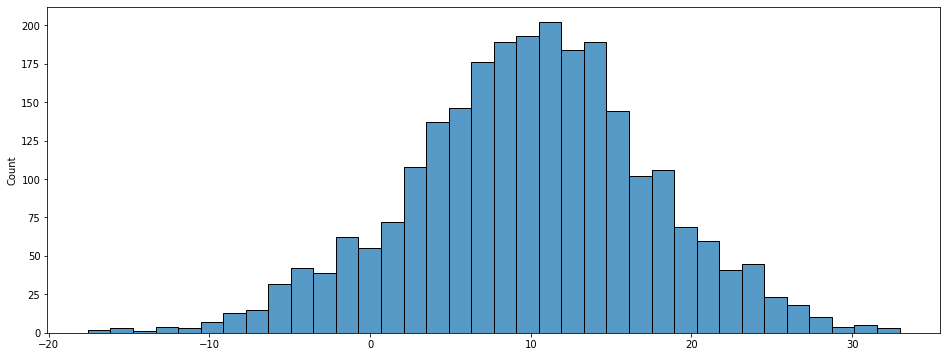

In [15]:
cadg=genos[genos.SNP.isin(scfile.id)]
cadg=cadg.merge(scfile, left_on='SNP', right_on="id")
cadg_concordant=cadg[cadg.COUNTED==cadg.ea]
# In case the effect allele is the ALTERNATE we flip the effect
cadg_discordant=cadg[cadg.ALT==cadg.ea]
cadg_discordant=cadg_discordant[samplecols].mul(cadg_discordant['wt']*-1, axis='index')
cadg_concordant=cadg_concordant[samplecols].mul(cadg_concordant['wt'], axis='index')
cadg=cadg_concordant.append(cadg_discordant)
cadg_sum=cadg.sum()
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(cadg_sum, ax=axes)

**Question 12:** Merge all scores into a single dataframe, and compute the correlations between your scores and the ones calculated by PLINK. Where do you think the difference comes from?

In [16]:
manmep=mepscoreg.to_frame().reset_index()
manmep.rename({'index' : 'id', 0:'MEP1Bmanual'}, axis='columns', inplace=True)
mancad=cadg.sum().to_frame().reset_index()
mancad.rename({'index' : 'id', 0:'CADmanual'}, axis='columns', inplace=True)
msc['id']=msc.FID+"_"+msc.IID
csc['id']=csc.FID+"_"+csc.IID
msc.drop(['FID', 'IID', 'PHENO', 'CNT', 'CNT2'], axis='columns', inplace=True)
csc.drop(['FID', 'IID', 'PHENO', 'CNT', 'CNT2'], axis='columns', inplace=True)
allsc=msc.merge(csc, on='id', how='outer')
allsc.rename({'SCORE_x':"MEP1B", "SCORE_y":"CAD"}, axis='columns', inplace=True)
allsc=allsc.merge(manmep, on="id", how='outer')
allsc=allsc.merge(mancad, on="id", how='outer')
allsc.iloc[:,[j for j, c in enumerate(allsc.columns) if j != 1]]=allsc.iloc[:,[j for j, c in enumerate(allsc.columns) if j != 1]].apply(lambda x: (x-x.mean())/x.std(), axis=0)
allsc.drop('id', axis='columns').corr()

,MEP1B,CAD,MEP1Bmanual,CADmanual
MEP1B,1.000000,-0.019078,1.000000,-0.019035
CAD,-0.019078,1.000000,-0.019078,0.999994
MEP1Bmanual,1.000000,-0.019078,1.000000,-0.019035
CADmanual,-0.019035,0.999994,-0.019035,1.000000


The difference comes from allele flipping which is done more carefully by Plink than us.

## Predictive accuracy of MEP1B levels and CAD events

**Question 13:** Download the CAD and MEP1B phenotypes for these individuals at https://www.dropbox.com/s/xs7wsgij95w2uau/CAD.phenotype?dl=1 and https://www.dropbox.com/s/5rmhjmv0d6oqxpr/MEP1B.phenotype?dl=1 and load them. Compute the Pearson's correlation for MEP1B, and the odds ratio for people in the top vs bottom deciles of the distribution for CAD. What can you say about the predictive accuracy of both scores?


In [17]:
!wget -O CAD.phenotype https://www.dropbox.com/s/xs7wsgij95w2uau/CAD.phenotype?dl=1
!wget -O MEP1B.phenotype  https://www.dropbox.com/s/5rmhjmv0d6oqxpr/MEP1B.phenotype?dl=1

--2021-11-25 04:29:09--  https://www.dropbox.com/s/xs7wsgij95w2uau/CAD.phenotype?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/xs7wsgij95w2uau/CAD.phenotype [following]
--2021-11-25 04:29:09--  https://www.dropbox.com/s/dl/xs7wsgij95w2uau/CAD.phenotype
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbe29cc8aef7928216a02b39bf2.dl.dropboxusercontent.com/cd/0/get/BamAbF0Q4ei3BMNCaStX72sAXLcqdWPZtqlyTwm_u_qWxCi5SAxme5UFPJa3uVbbxYI8O1hVt5lNSdNLyhkG2oQbD3W4m3DHzZECjnhcLoL5apuw3go6l347qjZ65r6Xyx8IszRgWVxG2ZaCC35YHn0n/file?dl=1# [following]
--2021-11-25 04:29:09--  https://ucbe29cc8aef7928216a02b39bf2.dl.dropboxusercontent.com/cd/0/get/BamAbF0Q4ei3BMNCaStX72sAXLcqdWPZtqlyTwm_u_qWxCi5SAxme5UFPJa3uVbbxYI8O1hVt5lNSdNLyhkG2

In [18]:
rCAD=pd.read_table("CAD.phenotype", header=None)
rMEP=pd.read_table("MEP1B.phenotype", header=None)
rCAD.columns=["id", "CADpheno"]
rMEP.columns=["id", "MEPpheno"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,MEP1B,MEPpheno
MEP1B,1.000000,0.427365
MEPpheno,0.427365,1.000000


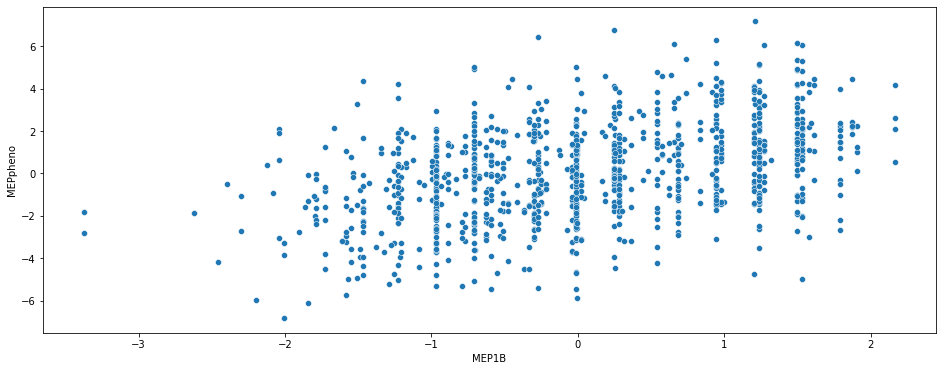

In [19]:
test=allsc.merge(rCAD, on="id").merge(rMEP, on="id")
fig, axes = plt.subplots(figsize=(16,6))
sns.scatterplot(test.MEP1B, test.MEPpheno, ax=axes)
test.loc[:,['MEP1B', 'MEPpheno']].corr()

In [20]:
ORlower=test.CADpheno[test.CAD<test.CAD.quantile(0.1)].value_counts()
ORlower=ORlower[1]/ORlower[0]
ORupper=test.CADpheno[test.CAD>test.CAD.quantile(0.9)].value_counts()
ORupper=ORupper[1]/ORupper[0]
ORupper/ORlower

6.6521739130434785

## PRS and Polygenicity

Until now, we have applied two genetic risk scores and examined how well they predict actual phenotypes. We will now examine what these scores can tell us about the genetic architecture of these traits.

**Question 14:** How many variants are present in each score? Does that correspond to what you know of the genetic architecture of both traits?

In [21]:
!wc -l *.scorefile
## Coronary artery disease is a complex, multifactorial and highly-polygenic disease. It is therefore expected that many variants will be contributing to the score.
## MEP1B is a circulating protein level, it is expected that cis-variants will exert a large effect, these traits are usually much less polygenic.

  75022 cad.scorefile
      7 mep1b.scorefile
  75029 total


**Question 15:** Perform a genome-wide association, using each score profile as a phenotype (you will need to create a properly formatted `.pheno` file) and `PRS.course.testset` as a binary genotype set, using PLINK's `--assoc` flag. Use `qmplot` to visualise the results. What can you say about these association results?

In [22]:
cadw=allsc.loc[:,['id','CAD']]
cadw[['FID', 'IID']]=cadw['id'].str.split('_', expand=True)
cadw=cadw.drop('id',axis=1)
cadw.iloc[:,[1,2,0]].to_csv("CAD.pheno", sep="\t", index=False)

In [23]:
!./plink --bfile PRS.course.testset --pheno CAD.pheno --allow-no-sex --assoc --out CAD

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to CAD.log.
Options in effect:
  --allow-no-sex
  --assoc
  --bfile PRS.course.testset
  --out CAD
  --pheno CAD.pheno

12991 MB RAM detected; reserving 6495 MB for main workspace.
175219 variants loaded from .bim file.
1000 people (0 males, 0 females, 1000 ambiguous) loaded from .fam.
Ambiguous sex IDs written to CAD.nosex .
1000 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1000 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%

In [24]:
cada=pd.read_table("CAD.qassoc", delim_whitespace=True)

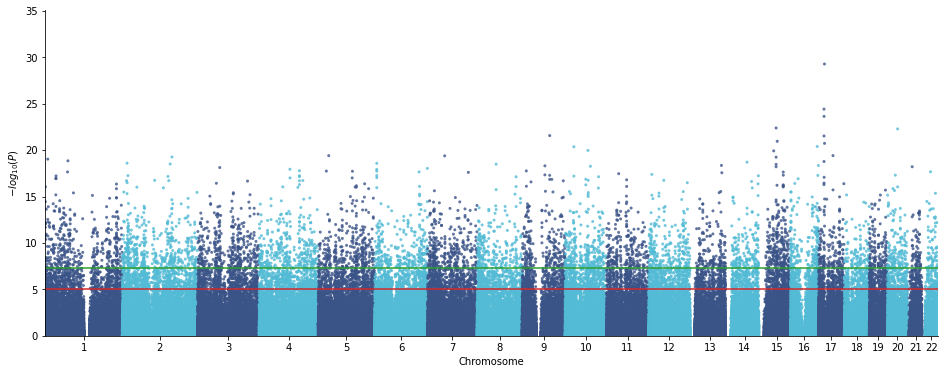

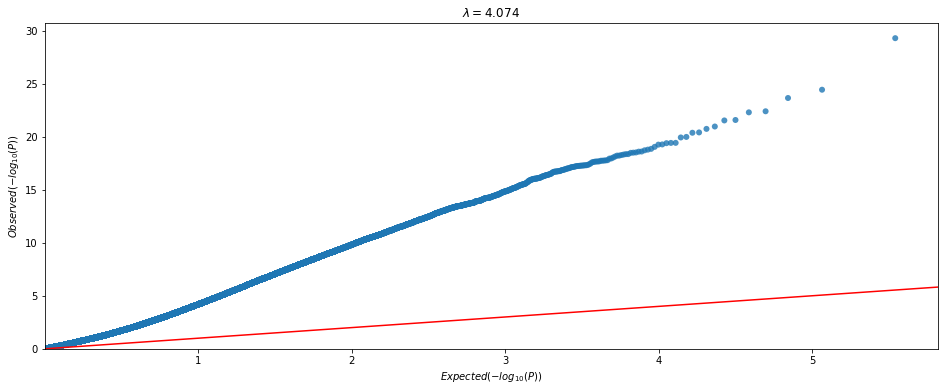

In [25]:
from qmplot import manhattanplot, qqplot
cada.dropna(how="any", inplace=True, axis=0)
fig, ax = plt.subplots(figsize=(16,6))
manhattanplot(cada, chrom="CHR", pos="BP", ax=ax)
fig, ax = plt.subplots(figsize=(16,6))
qqplot(cada.P, ax=ax)

**Question 16:** This cohort is multiethnic, and there is therefore a strong chance that some score variants will be correlated with ethnicity. Download genetic principal components from https://www.dropbox.com/s/5phdnh9st0p5dah/PCs.eigenvec?dl=1 and use them as covariates using the `--linear` and `--covar` flags of PLINK. Check that your association results are now well-behaved.



In [26]:
!wget -O PCs.eigenvec https://www.dropbox.com/s/5phdnh9st0p5dah/PCs.eigenvec?dl=1
!./plink --pheno CAD.pheno --bfile PRS.course.testset --linear hide-covar --covar PCs.eigenvec --out CAD.wPC --allow-no-sex

--2021-11-25 04:29:17--  https://www.dropbox.com/s/5phdnh9st0p5dah/PCs.eigenvec?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/5phdnh9st0p5dah/PCs.eigenvec [following]
--2021-11-25 04:29:17--  https://www.dropbox.com/s/dl/5phdnh9st0p5dah/PCs.eigenvec
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3178de193c2057ee1519d61b14.dl.dropboxusercontent.com/cd/0/get/BalHhq0rY7XfTh0SyE2N2TzmjkYznvezEzgF1oXUWhmcRfYzPBo807JMpsiKVFUIM1jiFP8SojcKtYJD1Rr-ZW7UDI1uommHUntAq3sUgUaM_OCO4792h8H5yARXZhZjyALPSnbTVOjCeGB4ZnYvnE6_/file?dl=1# [following]
--2021-11-25 04:29:18--  https://uc3178de193c2057ee1519d61b14.dl.dropboxusercontent.com/cd/0/get/BalHhq0rY7XfTh0SyE2N2TzmjkYznvezEzgF1oXUWhmcRfYzPBo807JMpsiKVFUIM1jiFP8SojcKtYJD1Rr-ZW7

In [27]:
mepw=allsc.loc[:,['id','MEP1B']]
mepw[['FID', 'IID']]=mepw['id'].str.split('_', expand=True)
mepw=mepw.drop('id',axis=1)
mepw.iloc[:,[1,2,0]].to_csv("MEP1B.pheno", sep="\t", index=False)

In [28]:
!./plink --pheno MEP1B.pheno --bfile PRS.course.testset --linear hide-covar --covar PCs.eigenvec --out MEP1B.wPC --allow-no-sex

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to MEP1B.wPC.log.
Options in effect:
  --allow-no-sex
  --bfile PRS.course.testset
  --covar PCs.eigenvec
  --linear hide-covar
  --out MEP1B.wPC
  --pheno MEP1B.pheno

12991 MB RAM detected; reserving 6495 MB for main workspace.
175219 variants loaded from .bim file.
1000 people (0 males, 0 females, 1000 ambiguous) loaded from .fam.
Ambiguous sex IDs written to MEP1B.wPC.nosex .
1000 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 covariates loaded.
Before main variant filters, 1000 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%3

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


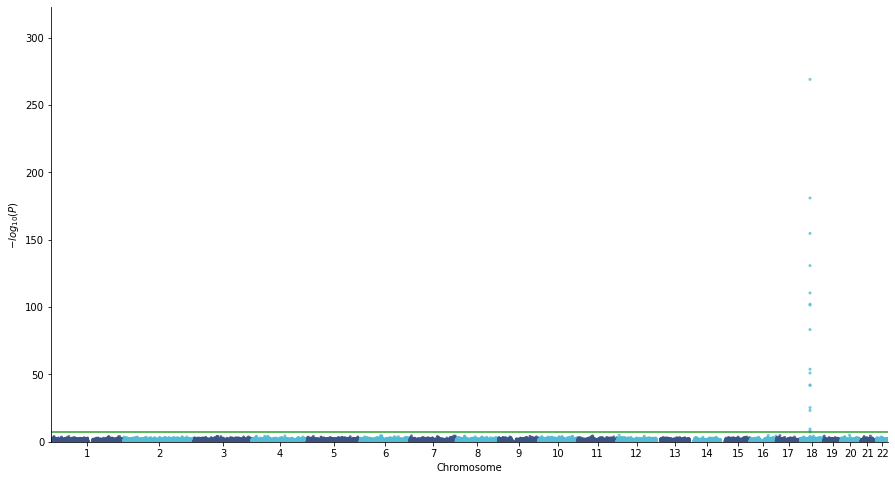

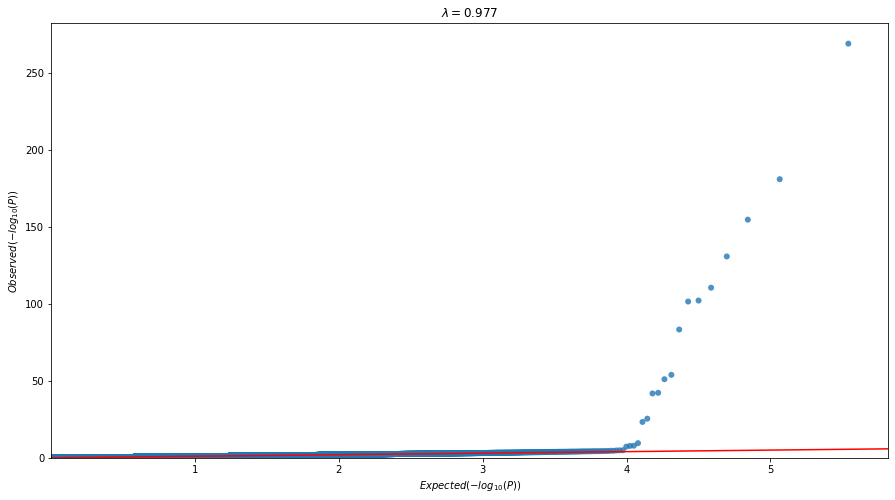

In [29]:
import numpy as np
mepa=pd.read_table("MEP1B.wPC.assoc.linear", delim_whitespace=True)
mepa['logp']=-1*np.log10(mepa.P)
mepa.replace([np.inf, -np.inf], np.nan, inplace=True)
mepa.dropna(how="any", inplace=True, axis=0)
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
m=manhattanplot(mepa, chrom="CHR", pos="BP", suggestiveline=None, ax=ax)
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
qqplot(mepa.P, ax=ax)
#plt.show()

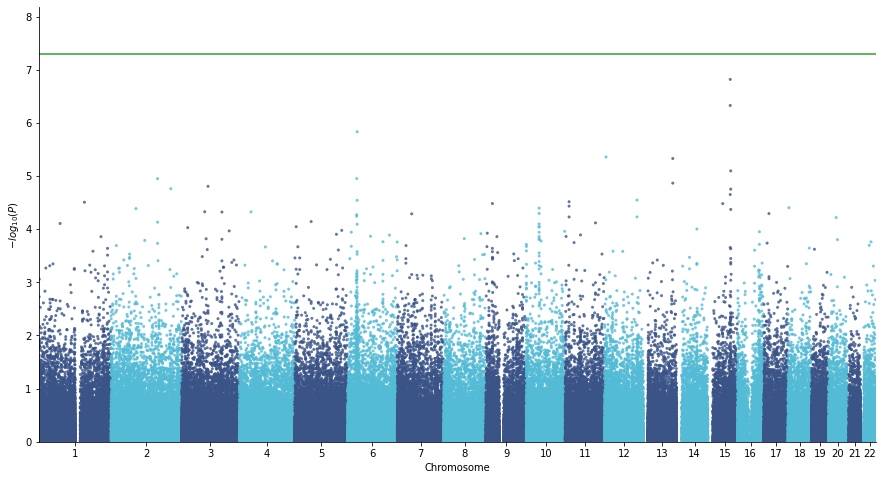

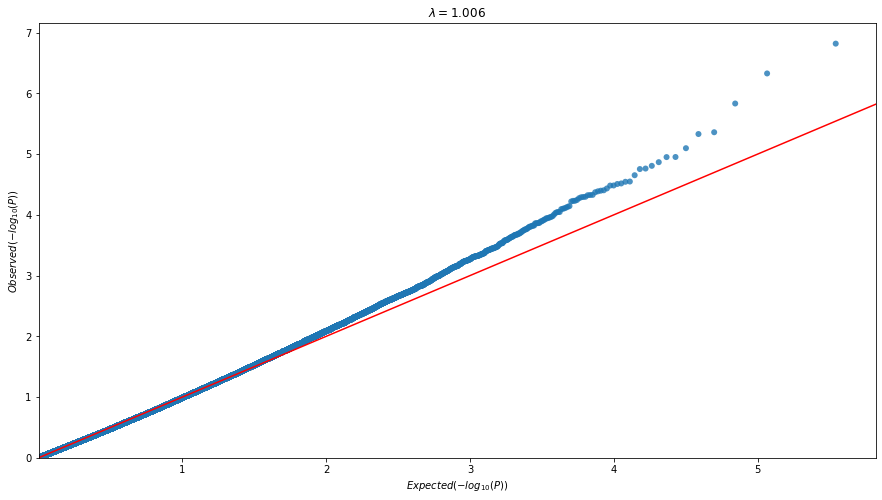

In [30]:
cada=pd.read_table("CAD.wPC.assoc.linear", delim_whitespace=True)
cada.dropna(how="any", inplace=True, axis=0)
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
m=manhattanplot(cada, chrom="CHR", pos="BP", suggestiveline=None, ax=ax)
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
m=qqplot(cada.P, ax=ax)


**Question 17:** What can you deduce from the two manhattan plots about the architecture of these two traits?

Both are perfectly controlled (lambdas very close to 1). We can see that while MEP1B is driven by a very strong effect signal that is detectable at current sample size (1000 individuals), CAD is a much more complex traits where no signal actually reaches significance level. This hints at GWAS power: proteome association studies can detect effects even with hundreds of samples, whereas complex trait associations require large meta-analyses of hundreds of thousands of samples.